<a href="https://colab.research.google.com/github/ashifka/ashif/blob/main/Ashif(Virtual_Competition2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
train_data = pd.read_csv('/content/train_ctrUa4K.csv')
train_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
test_data = pd.read_csv('/content/test_lAUu6dG.csv')
test_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [4]:
train_data.drop(columns =['Loan_ID'],inplace = True)
test_data.drop(columns =['Loan_ID'],inplace = True)

# **Exploratory Data Analysis**


<Axes: xlabel='Loan_Status', ylabel='count'>

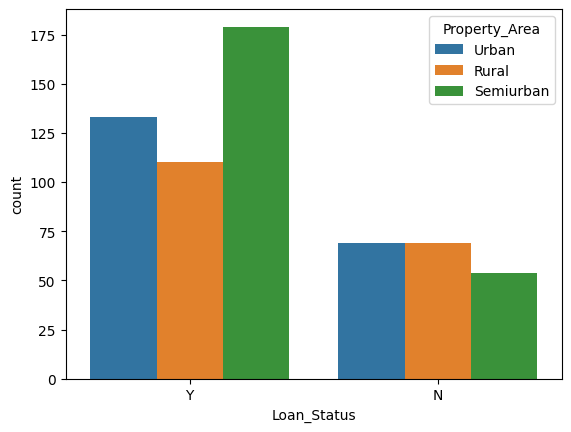

In [5]:
sns.countplot(data = train_data,x = 'Loan_Status',hue = 'Property_Area')

<Axes: xlabel='Loan_Status', ylabel='count'>

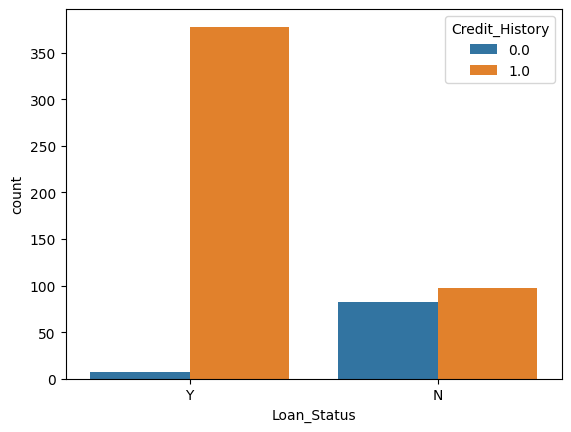

In [6]:
sns.countplot(data = train_data,x = 'Loan_Status',hue = 'Credit_History')

<Axes: xlabel='Loan_Status', ylabel='CoapplicantIncome'>

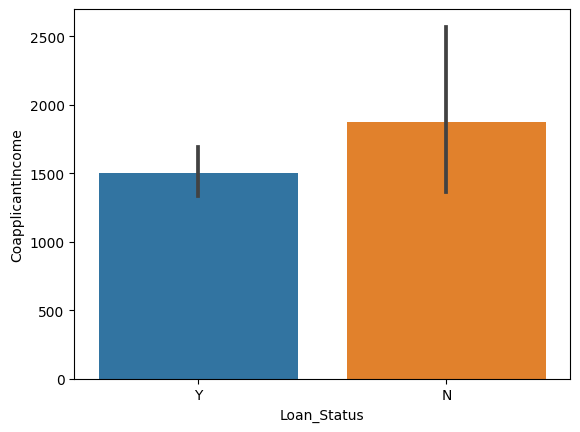

In [7]:
sns.barplot(data =train_data,x = 'Loan_Status',y ='CoapplicantIncome')

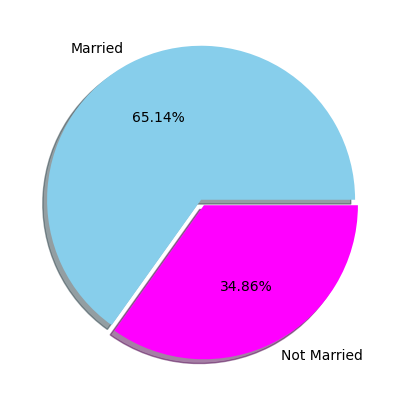

In [8]:
size = train_data['Married'].value_counts()
labels = ['Married', 'Not Married']
color = ['skyblue', 'magenta']
explode = [0.02, 0.02]

plt.figure(figsize = (5,5))
plt.pie(size, labels=labels, colors=color, explode=explode, autopct='%.2f%%', shadow = True)
plt.show()

#**Pre-processing**

In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [10]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             356 non-null    object 
 1   Married            367 non-null    object 
 2   Dependents         357 non-null    object 
 3   Education          367 non-null    object 
 4   Self_Employed      344 non-null    object 
 5   ApplicantIncome    367 non-null    int64  
 6   CoapplicantIncome  367 non-null    int64  
 7   LoanAmount         362 non-null    float64
 8   Loan_Amount_Term   361 non-null    float64
 9   Credit_History     338 non-null    float64
 10  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(6)
memory usage: 31.7+ KB


In [11]:
train_data.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [12]:
test_data.isnull().sum()

Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [13]:
train_data.fillna(train_data.mean(), inplace=True)
train_data.fillna(train_data.mode().iloc[0],inplace=True)
test_data.fillna(train_data.mean(), inplace=True)
test_data.fillna(train_data.mode().iloc[0],inplace=True)

In [14]:
train_data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [15]:
test_data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [16]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
label_encoder = LabelEncoder()
train_data['Gender'] = label_encoder.fit_transform(train_data['Gender'])
test_data['Gender'] = label_encoder.fit_transform(test_data['Gender'])

In [17]:
train_data['Married'] = label_encoder.fit_transform(train_data['Married'])
test_data['Married'] = label_encoder.fit_transform(test_data['Married'])

In [18]:
train_data['Dependents'] = train_data['Dependents'].str.rstrip('+')
test_data['Dependents'] = test_data['Dependents'].str.rstrip('+')

In [19]:
train_data['Education'] = label_encoder.fit_transform(train_data['Education'])
test_data['Education'] = label_encoder.fit_transform(test_data['Education'])

In [20]:
train_data['Self_Employed'] = label_encoder.fit_transform(train_data['Self_Employed'])
test_data['Self_Employed'] = label_encoder.fit_transform(test_data['Self_Employed'])

In [21]:
train_data['Property_Area'] = label_encoder.fit_transform(train_data['Property_Area'])
test_data['Property_Area'] = label_encoder.fit_transform(test_data['Property_Area'])

In [22]:
train_data['Loan_Status'] = label_encoder.fit_transform(train_data['Loan_Status'])

In [23]:
scaler = StandardScaler()
numerical_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
for col in numerical_cols:
    train_data[col] = scaler.fit_transform(train_data[col].values.reshape(-1, 1))
    test_data[col] = scaler.transform(test_data[col].values.reshape(-1, 1))

# **Modelling**

<Axes: >

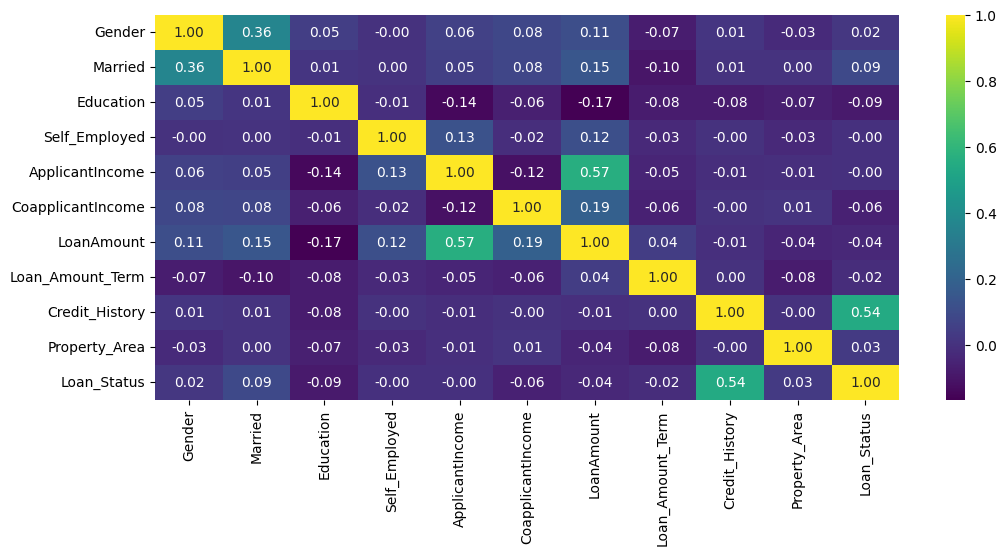

In [24]:
plt.figure(figsize = (12,5))
sns.heatmap(train_data.corr(), cmap='viridis', annot=True, fmt='.2f')

In [25]:
X = train_data.drop('Loan_Status', axis = 1)
y = train_data['Loan_Status']
X_test = test_data

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)
from sklearn.metrics import accuracy_score

models = {
  'LogisticRegression': LogisticRegression(),
    'SVC': SVC(),
    'RandomForestClassifier': RandomForestClassifier(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier()
}


In [27]:
max_length = max(len(name) for name in models.keys())
for name, model in models.items():
    model = model
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    print(f'{name.ljust(max_length)} : {accuracy:.5f}')

LogisticRegression     : 0.83740
SVC                    : 0.83740
RandomForestClassifier : 0.79675
KNeighborsClassifier   : 0.78862
DecisionTreeClassifier : 0.69106


# **Fine tuning**


In [28]:
params = {
    'LogisticRegression' : {
        'model' : LogisticRegression(),
        'param' : {
            'penalty' : ['l1', 'l2'],
            'solver' : ['liblinear', 'solver'],
            'C' : [0.1, 0.3, 0.5, 0.7, 0.9, 1.0],
            'max_iter': [300, 500, 900, 1100, 1500, 2100]
        }
    },
    'SVC' : {
        'model' : SVC(),
        'param' : {
            'kernel' : ['linear', 'rbf'],
            'C' : [0.1, 1.0],
            'degree' : [3]
        }
    },
    'RandomForestClassifier' : {
        'model' : RandomForestClassifier(),
        'param' : {
            'n_estimators' : [300, 500, 1000],
            'max_depth' : [3, 9, 13, 15],
            'max_features' : ["auto", "sqrt"],
            'min_samples_split' : [2, 6]
        }
    },
    'KNeighborsClassifier' : {
        'model' : KNeighborsClassifier(),
        'param' : {
            'n_neighbors': [3, 7, 10],
            'weights': ['uniform', 'distance'],
            'metric': ['euclidean', 'manhattan']
        }
    },
    'DecisionTreeClassifier' : {
        'model' : DecisionTreeClassifier(),
        'param' : {
            'max_depth': [3, 7, 10],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
    }
}


In [29]:
from sklearn.model_selection import  RandomizedSearchCV, cross_val_score

In [30]:
scores = []
for clf_name, clf_details in params.items():
    model = models[clf_name]
    param_grid = clf_details['param']

    random_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=50, verbose=1, n_jobs=-1)

    random_search.fit(X_train, y_train)

    score = random_search.best_score_
    best_parameter = random_search.best_params_
    scores.append((clf_name, score, best_parameter))

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Fitting 5 folds for each of 27 candidates, totalling 135 fits


In [31]:
final = pd.DataFrame(scores, columns=['Model', 'Score', 'Best Parameter'])
final = final.sort_values('Score', ascending=False)
final

,Model,Score,Best Parameter
2,RandomForestClassifier,0.806473,"{'n_estimators': 300, 'min_samples_split': 2, ..."
0,LogisticRegression,0.804432,"{'solver': 'liblinear', 'penalty': 'l1', 'max_..."
1,SVC,0.804432,"{'kernel': 'linear', 'degree': 3, 'C': 0.1}"
4,DecisionTreeClassifier,0.796331,"{'min_samples_split': 5, 'min_samples_leaf': 1..."
3,KNeighborsClassifier,0.727067,"{'weights': 'uniform', 'n_neighbors': 10, 'met..."


In [46]:
final['Best Parameter'].iloc[0]

{'n_estimators': 300,
 'min_samples_split': 2,
 'max_features': 'auto',
 'max_depth': 3}

In [41]:
classifier = RandomForestClassifier(n_estimators = 300,min_samples_split = 2,max_features = 'auto',max_depth = 3)
classifier.fit(X, y)
pred = classifier.predict(X_test)

In [42]:
test_df = pd.read_csv('/content/test_lAUu6dG.csv')
submission = pd.read_csv('/content/sample_submission_49d68Cx.csv')

submission['Loan_ID'] = test_df['Loan_ID']

In [45]:
submission['Loan_Status'] = pred
submission['Loan_Status'] = submission['Loan_Status'].map({1: 'Y', 0: 'N'})
submission.to_csv('sample_submission.csv', index=False)

# **MY SCORE:0.78**
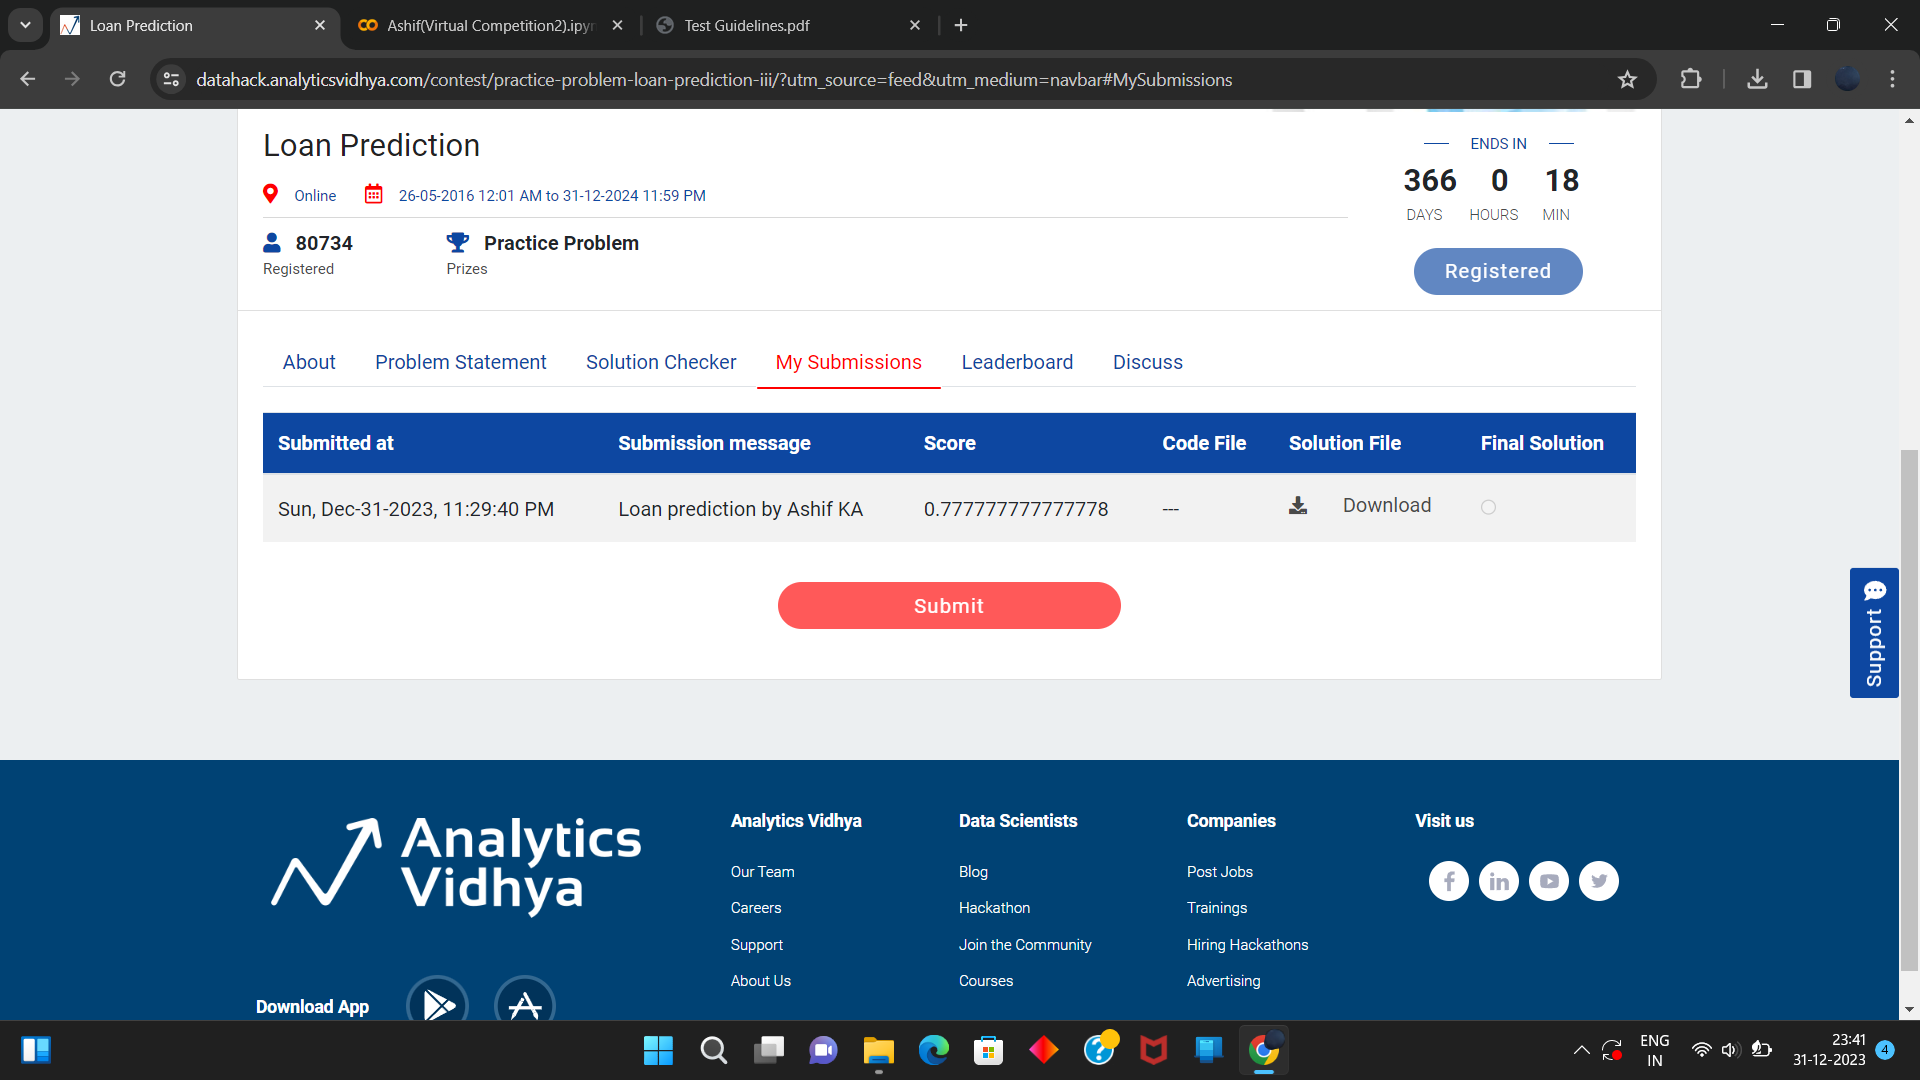